[*********************100%***********************]  1 of 1 completed

Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.40      0.45        75
           1       0.49      0.60      0.54        73

    accuracy                           0.50       148
   macro avg       0.50      0.50      0.50       148
weighted avg       0.50      0.50      0.49       148



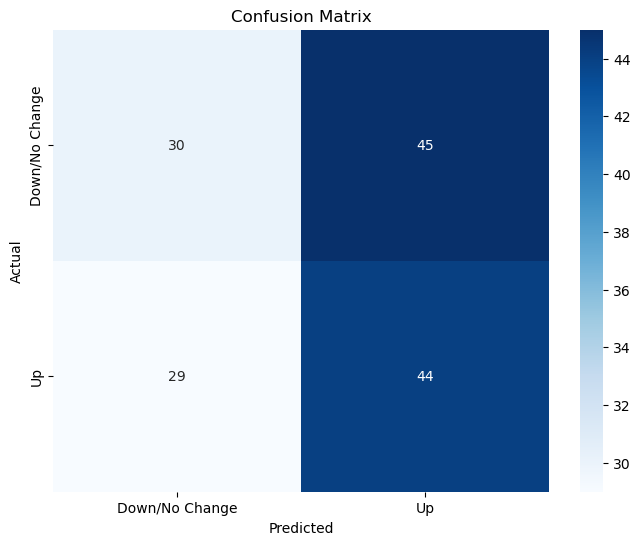

In [2]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch stock data
ticker = "AAPL"  # Example: Apple Inc.
stock_data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Prepare features
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Moving_Avg_5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['Moving_Avg_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=5).std()

# Define binary target (1 = Price goes up, 0 = Price goes down/stays the same)
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

# Drop NaN values
stock_data = stock_data.dropna()

# Features and target
X = stock_data[['Close', 'Return', 'Moving_Avg_5', 'Moving_Avg_20', 'Volatility']]
y = stock_data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down/No Change', 'Up'], 
            yticklabels=['Down/No Change', 'Up'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [3]:
pip install fastapi uvicorn

  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.3 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: anyio
    Found existing installa